In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [139]:
import pandas as pd
df1 = pd.read_csv("Dataset Generation (2024) (Responses) - Form Responses 1.csv")
df2 = pd.read_csv("Dataset Generation (Fardina) (Responses) - Form Responses 1.csv")
df3 = pd.read_csv("Dataset Generation (Max) (Responses) - Form Responses 1.csv")

In [140]:
# check for duplicates
print(len(df1))
print(len(df1.drop_duplicates()))

print(len(df2))
print(len(df2.drop_duplicates()))

print(len(df3))
print(len(df3.drop_duplicates()))

133
133
144
144
103
103


In [141]:
print(len(df2))
# gets rid of people who we can't identify what their background is, because without any background, any analysis is not as important compared to those with
df2.dropna(subset=['What year are you?', 'How old are you?', 'You could describe the adults you grew up with as...', 'You could describe yourself as...', 'How would you rate your religiousness / spirituality?', 'What bests represents your gender?'], how='all', inplace = True)
print(len(df2))

144
139


In [142]:

def find_and_fill(row, parent_df):
  if pd.isna(row['How old are you?']):
    year = row['What year are you?']
    med_val = parent_df.loc[parent_df['What year are you?'] == year]['How old are you?'].median()
    row['How old are you?'] = med_val
    print(row['How old are you?'])

  return row

def fix_female(value):
  if value == 'Famale':
    value = 'Female'
  return value

# finds any missing years, fills in with median of what year they are in
df2 = df2.apply(find_and_fill, args=(df2,), axis = 1)
print(len(df2))

# fix famale to female
df2['What bests represents your gender?'] = df2['What bests represents your gender?'].apply(fix_female)

# changes ['Timestamp'] to datetime objects
#df2['Timestamp'] = pd.to_datetime(df2['Timestamp'])



139


In [143]:
import statistics as stat

for column in df2.iloc[:, 8:]:
    col = df2[column]
    mode_val = stat.mode(col)
    df2[column] = df2[column].fillna(value = mode_val)

In [144]:

df_stud_belief = df2[['How would you rate your religiousness / spirituality?']]
df_stud_belief.columns = ['Spirituality']
df_stud_belief.head()

df_agg = df_stud_belief.groupby('Spirituality').agg(cnt=('Spirituality', 'count'))
df_agg['percent'] = (df_agg['cnt'] / df_agg['cnt'].sum()) * 100
df_agg



,cnt,percent
Spirituality,,
Not spiritual at all,60,43.165468
Somewhat spiritual,58,41.726619
Strongly spiritual,21,15.107914


In [ ]:
df_strong_spirit = df2.loc[df2['How would you rate your religiousness / spirituality?'] == 'Strongly spiritual']
df_strong_spirit.head()

df_some_spirit = df2.loc[df2['How would you rate your religiousness / spirituality?'] == 'Somewhat spiritual']
df_some_spirit.head()

df_no_spirit = df2.loc[df2['How would you rate your religiousness / spirituality?'] == 'Not spiritual at all']
df_no_spirit.head()

In [147]:
from scipy.stats import chi2_contingency

alpha = .05
test_col = df_strong_spirit['You could describe yourself as...']
results = {}

for col in df_strong_spirit.iloc[:, 8:]:
  contingency_table = pd.crosstab(test_col, df_strong_spirit[col])
  chi2, p, dof, ex = chi2_contingency(contingency_table)
  results[col] = p

for col in results:
  value = results[col]
  if value <= alpha:
    print(value)
    print(f'Statistically Significant with alpha value = {alpha}')
    print(f'{col}\n')
  else:
    print(value)
    print(f'Not Statistically Significant with alpha value = {alpha}\n')

#df_strong_spirit

0.9041289202892122
Not Statistically Significant with alpha value = 0.05

0.0670823144740548
Not Statistically Significant with alpha value = 0.05

0.38053470434650843
Not Statistically Significant with alpha value = 0.05

0.22258530179328923
Not Statistically Significant with alpha value = 0.05

0.643031186678383
Not Statistically Significant with alpha value = 0.05

0.5596824781688555
Not Statistically Significant with alpha value = 0.05

0.6223551089142225
Not Statistically Significant with alpha value = 0.05

0.47519123693227727
Not Statistically Significant with alpha value = 0.05

0.08600746893544146
Not Statistically Significant with alpha value = 0.05

0.658121368701936
Not Statistically Significant with alpha value = 0.05

0.303498426525159
Not Statistically Significant with alpha value = 0.05

0.14039320844793488
Not Statistically Significant with alpha value = 0.05

0.46615102000820086
Not Statistically Significant with alpha value = 0.05

0.16483265332363622
Not Statistical

In [148]:
from scipy.stats import chi2_contingency

alpha = .05
test_col = df_some_spirit['You could describe yourself as...']
results = {}

for col in df_some_spirit.iloc[:, 8:]:
  contingency_table = pd.crosstab(test_col, df_some_spirit[col])
  chi2, p, dof, ex = chi2_contingency(contingency_table)
  results[col] = p

for col in results:
  value = results[col]
  if value <= alpha:
    print(value)
    print(f'Statistically Significant with alpha value = {alpha}')
    print(f'{col}\n')
  else:
    print(value)
    print(f'Not Statistically Significant with alpha value = {alpha}\n')


0.6007473747974617
Not Statistically Significant with alpha value = 0.05

0.08052346580351205
Not Statistically Significant with alpha value = 0.05

0.21910145553289576
Not Statistically Significant with alpha value = 0.05

0.11672591114095864
Not Statistically Significant with alpha value = 0.05

0.45775936743255974
Not Statistically Significant with alpha value = 0.05

0.3316237599683595
Not Statistically Significant with alpha value = 0.05

0.22930100468572753
Not Statistically Significant with alpha value = 0.05

0.18382325139949407
Not Statistically Significant with alpha value = 0.05

0.2778270912159271
Not Statistically Significant with alpha value = 0.05

0.04535059745410663
Statistically Significant with alpha value = 0.05
One of my children wants to go to an expensive school to become a dentist. I told them I'd be fine paying for it. The other one wants to go to a similarly expensive school to become a teacher. I told her that I wouldn't pay for her schooling unless she picke

In [150]:
from scipy.stats import chi2_contingency

alpha = .05
test_col = df_no_spirit['You could describe yourself as...']
results = {}

for col in df_no_spirit.iloc[:, 8:]:
  contingency_table = pd.crosstab(test_col, df_no_spirit[col])
  chi2, p, dof, ex = chi2_contingency(contingency_table)
  #print(f'chi: {chi2}')
  #print(f'dof: {dof}')
  results[col] = p

for col in results:
  value = results[col]
  if value <= alpha:
    print(value)
    print(f'Statistically Significant with alpha value = {alpha}')
    print(f'{col}\n')
  else:
    print(value)
    print(f'Not Statistically Significant with alpha value = {alpha}\n')


0.09428239599341712
Not Statistically Significant with alpha value = 0.05

0.007986286031439553
Statistically Significant with alpha value = 0.05
My daughter is getting married soon. I only learned about her a few years ago. We've been building a relationship the last few years though and I am lucky to have her in my life now. Recently, she asked me to walk her down the aisle and while I am honored I told her no. Her step-dad practically raised her from a baby and I think that he deserves it far more than me. She was really upset and hurt when I said no. Am I a jerk?

0.1495273630107884
Not Statistically Significant with alpha value = 0.05

0.503284401463642
Not Statistically Significant with alpha value = 0.05

0.16779966172272917
Not Statistically Significant with alpha value = 0.05

0.07143928183110661
Not Statistically Significant with alpha value = 0.05

0.47857368022813707
Not Statistically Significant with alpha value = 0.05

0.4805030614489263
Not Statistically Significant with

In [151]:
df_strong_spirit.iloc[:, 4]
df_strong_spirit.iloc[:, 8:]

result_ss = pd.concat([df_strong_spirit.iloc[:, 4], df_strong_spirit.iloc[:, 8:]], axis=1)

result_ss.columns = ['poli', 'q1','q2','q3','q4','q5','q6','q7','q8','q9','q10','q11','q12','q13','q14']
result_ss

df_some_spirit.iloc[:, 4]
df_some_spirit.iloc[:, 8:]

result_ms = pd.concat([df_some_spirit.iloc[:, 4], df_some_spirit.iloc[:, 8:]], axis=1)

result_ms.columns = ['poli', 'q1','q2','q3','q4','q5','q6','q7','q8','q9','q10','q11','q12','q13','q14']
result_ms

df_no_spirit.iloc[:, 4]
df_no_spirit.iloc[:, 8:]

result_ns = pd.concat([df_no_spirit.iloc[:, 4], df_no_spirit.iloc[:, 8:]], axis=1)

result_ns.columns = ['poli', 'q1','q2','q3','q4','q5','q6','q7','q8','q9','q10','q11','q12','q13','q14']
#result_ns

0

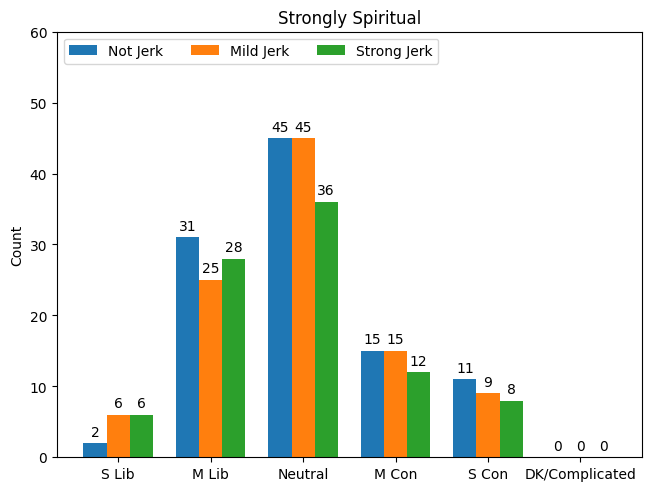

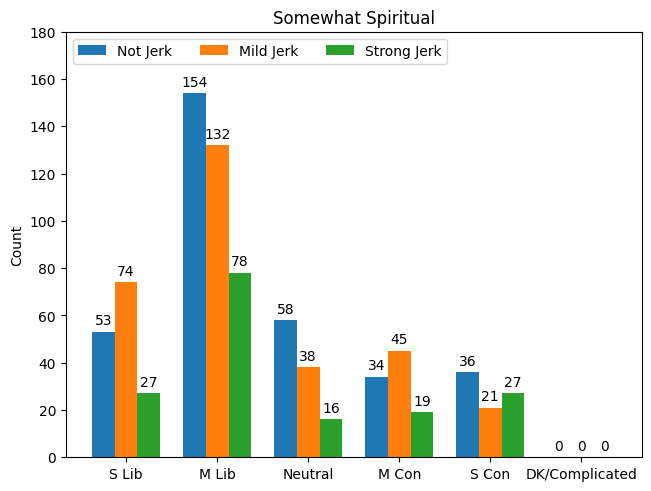

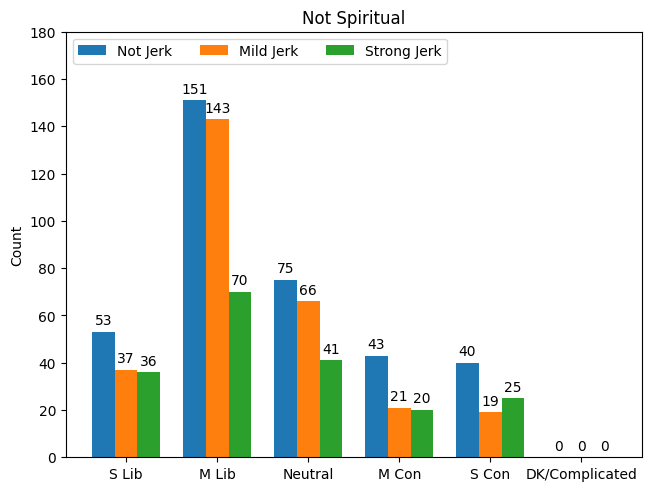

In [152]:
import matplotlib.pyplot as plt
import numpy as np

def bar_chart(parent_df, limit, title):
  poli = ('S Lib', 'M Lib', 'Neutral', 'M Con', 'S Con', 'DK/Complicated')

  not_j = [0,0,0,0,0,0]
  mild_j = [0,0,0,0,0,0]
  strong_j = [0,0,0,0,0,0]

  for index, row in parent_df.iterrows():
    #print(row['q1'])
    for col in parent_df.columns:
      if row[col] == 'Not a jerk' and row['poli'] == 'Strongly liberal':
        not_j[0] += 1
      elif row[col] == 'Not a jerk' and row['poli'] == 'Mildly liberal':
        not_j[1] += 1
      elif row[col] == 'Not a jerk' and row['poli'] == 'Neutral':
        not_j[2] += 1
      elif row[col] == 'Not a jerk' and row['poli'] == 'Mildly conservative':
        not_j[3] += 1
      elif row[col] == 'Not a jerk' and row['poli'] == 'Strongly conservative':
        not_j[4] += 1
      elif row[col] == 'Not a jerk' and row['poli'] == 'Don\'t know / It\'s complicated':
        not_j[4] += 1
      elif row[col] == 'Mildly a jerk' and row['poli'] == 'Strongly liberal':
        mild_j[0] += 1
      elif row[col] == 'Mildly a jerk' and row['poli'] == 'Mildly liberal':
        mild_j[1] += 1
      elif row[col] == 'Mildly a jerk' and row['poli'] == 'Neutral':
        mild_j[2] += 1
      elif row[col] == 'Mildly a jerk' and row['poli'] == 'Mildly conservative':
        mild_j[3] += 1
      elif row[col] == 'Mildly a jerk' and row['poli'] == 'Strongly conservative':
        mild_j[4] += 1
      elif row[col] == 'Mildly a jerk' and row['poli'] == 'Don\'t know / It\'s complicated':
        mild_j[4] += 1
      elif row[col] == 'Strongly a jerk' and row['poli'] == 'Strongly liberal':
        strong_j[0] += 1
      elif row[col] == 'Strongly a jerk' and row['poli'] == 'Mildly liberal':
        strong_j[1] += 1
      elif row[col] == 'Strongly a jerk' and row['poli'] == 'Neutral':
        strong_j[2] += 1
      elif row[col] == 'Strongly a jerk' and row['poli'] == 'Mildly conservative':
        strong_j[3] += 1
      elif row[col] == 'Strongly a jerk' and row['poli'] == 'Strongly conservative':
        strong_j[4] += 1
      elif row[col] == 'Strongly a jerk' and row['poli'] == 'Don\'t know / It\'s complicated':
        strong_j[4] += 1


  jerks = {
      'Not Jerk': tuple(not_j),
      'Mild Jerk': tuple(mild_j),
      'Strong Jerk': tuple(strong_j)
  }

  x = np.arange(6)
  width = 0.25  # the width of the bars
  multiplier = 0

  fig, ax = plt.subplots(layout='constrained')


  for attribute, measurement in jerks.items():
      offset = width * multiplier
      rects = ax.bar(x + offset, measurement, width, label=attribute)
      ax.bar_label(rects, padding=3)
      multiplier += 1

  ax.set_title(title)
  ax.set_ylabel('Count')
  ax.set_xticks(x + width, poli)
  ax.legend(loc='upper left', ncols=3)
  ax.set_ylim(0,limit)

  #plt.show()
  return 0


#result_ss.apply(bar_chart, args=(result_ss,))
bar_chart(result_ss, 60, 'Strongly Spiritual')
bar_chart(result_ms, 180, 'Somewhat Spiritual')
bar_chart(result_ns, 180, 'Not Spiritual')